In [9]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import fsolve
import scipy.constants as sc
from astropy.constants import codata2018 as ac
from astropy.constants import iau2015 as aa
import astropy.units as u
from astropy.cosmology import Planck15 as cosmo

In [68]:
z= np.linspace(800, 2000, num=500)

# rhoC_0 = 3 * cosmo.H(0)**2 / (8 * np.pi * ac.G)
eta = 6.1e-10
zeta3 = np.sum((n**-3 for n in range(1, int(1e6))))
# n_e = rhoC * cosmo.Ob(z) / ac.m_p

argument = (
    eta
    * 4 * np.sqrt(2 / np.pi) * zeta3 
    *(cosmo.Tcmb(z) * ac.k_B / ac.m_e /ac.c**2)**(3/2) 
    * np.exp(
        13.6 *u.eV 
        / (ac.k_B * cosmo.Tcmb(z)))
    ).to(u.dimensionless_unscaled)
derivative = lambda x : -2 * x**-3 + x**-2

x_ratio = [fsolve(lambda x : (1-x)/x**2 - a, .001, fprime=derivative) for a in argument]

In [38]:
z_nophotons = np.linspace(1500, 5000)

# rhoC_0 = 3 * cosmo.H(0)**2 / (8 * np.pi * ac.G)
eta_nophotons = 1
# zeta3 = np.sum((n**-3 for n in range(1, int(1e6))))
# n_e = rhoC * cosmo.Ob(z) / ac.m_p

argument_nophotons = (
    eta
    * 4 * np.sqrt(2 / np.pi) * zeta3 
    *(cosmo.Tcmb(z_nophotons) * ac.k_B / ac.m_e /ac.c**2)**(3/2) 
    * np.exp(
        13.6 *u.eV 
        / (ac.k_B * cosmo.Tcmb(z_nophotons)))
    ).to(u.dimensionless_unscaled)
derivative = lambda x : -2 * x**-3 + x**-2

x_ratio_nophotons = [fsolve(lambda x : (1-x)/x**2 - a, .001, fprime=derivative) for a in argument_nophotons]

In [69]:
from matplotlib import rc
rc('text.latex', preamble=r'''\usepackage{amsmath}
          \usepackage{physics}
          \usepackage{siunitx}
          ''')
rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)
def lsave(name, ext='pdf'):
    if os.path.exists('figures'):
        path = os.path.join('figures', name + '.' + ext)
        pathfig = os.path.join('figures', name + '.' + ext)
    else:
        path = name + '.' + ext
        pathfig = os.path.join('figures', name + '.' + ext)
    plt.savefig(path, format='pdf')

    latex_string = f"""\\begin{{figure}}[ht]\n\\centering\n\\includegraphics[width=\\textwidth]{{{pathfig}}}\n\\caption{{}}\n\\label{{fig:{name}}}\n\\end{{figure}}"""

    print(latex_string)

plt.plot(z, x_ratio)
plt.xlim(plt.xlim()[::-1])
plt.grid("on")
plt.xlabel("redshift $z$")
plt.ylabel("ionization fraction $X_e$")
lsave("ionization")

\begin{figure}[ht]
\centering
\includegraphics[width=\textwidth]{figures/ionization.pdf}
\caption{}
\label{fig:ionization}
\end{figure}


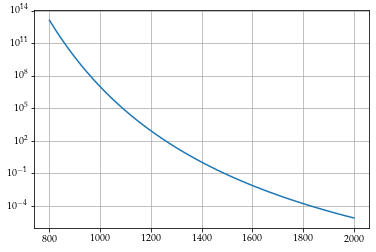

In [20]:
plt.semilogy(z, argument)
plt.grid("on")
plt.show()

\begin{figure}[ht]
\centering
\includegraphics[width=\textwidth]{figures/ionization_nophotons.pdf}
\caption{}
\label{fig:ionization_nophotons}
\end{figure}


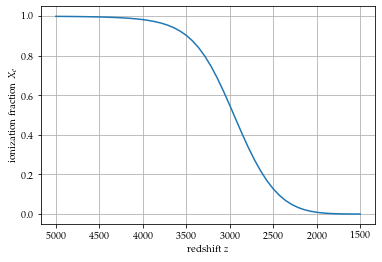

In [36]:
plt.plot(z_nophotons, x_ratio_nophotons)
plt.xlim(plt.xlim()[::-1])
plt.grid("on")
plt.xlabel("redshift $z$")
plt.ylabel("ionization fraction $X_e$")
lsave("ionization_nophotons")

In [71]:
rhoC = 3 * cosmo.H(z)**2 / (8 * np.pi * ac.G)
n_e = (np.array(x_ratio)[:,0] * rhoC * cosmo.Ob(z) / ac.m_p).cgs

In [72]:
%matplotlib qt
Gamma = n_e * ac.sigma_T * ac.c
plt.semilogy(z, (Gamma / cosmo.H(z)).decompose())
plt.show()